# Ćwiczenia 05.10.2018

Bierzemy początkową funkcję masy gwiazd -> oceniamy liczbę białych karłów i innych masywnych rzeczy w Galaktyce

In [81]:
# Założenie
N_gwiazd = 200e9 # w naszej galaktyce

$$ f(M) = dN/dM = A_1 M^{-1.3} $$

od 0.08 do 0.5 mas słońca

$$ f(M) = dN/dM = A_2 M^{-2.2} $$

od 0.5 do 1 mas słońca

$$ f(M) = dN/dM = A_3 M^{-2.5} $$

od 1 do 150 mas słońca

Ile spodziewamy się gwiazd neutronowych (powstają z gwiazd o masie początkowej 8-20 mas słońca) i czarnych dziur (20 mas słońca)?

*przyjmuję masę Słońca równą 1.*

In [82]:
%matplotlib inline
from sympy.abc import *
import sympy
sympy.init_printing()

In [83]:
A1, A2, A3, M = sympy.symbols('A_1, A_2, A_3, M', positive=True)
f1 = A1 * M**-1.3
f2 = A2 * M**-2.2
f3 = A3 * M**-2.5

In [84]:
ciągłość = [sympy.Eq(f1, f2).subs({M:0.5}),
            sympy.Eq(f2, f3).subs({M:1})
           ]
ciągłość

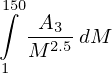

In [67]:
sympy.Integral(f3, (M, 1, 150))

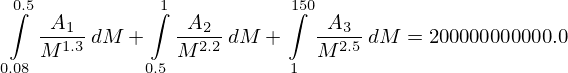

In [68]:
normalizacja = sympy.Integral(f1, (M, 0.08, 0.5)) +\
            sympy.Integral(f2, (M, 0.5, 1)) +\
            sympy.Integral(f3, (M, 1, 150))
warunek_normalizacji = sympy.Eq(normalizacja, N_gwiazd)
warunek_normalizacji

In [69]:
wartości = sympy.solve(ciągłość + [warunek_normalizacji.doit()], (A1, A2, A3))
wartości

In [70]:
gwiazdy_neutronowe = sympy.Integral(f3, (M, 8, 20)).subs(wartości).doit()
print(f"{gwiazdy_neutronowe:.3e}")

5.981e+8


In [71]:
czarne_dziury = sympy.Integral(f3, (M, 20, 150)).subs(wartości).doit()
print(f"{czarne_dziury:.3e}")

1.927e+8


In [96]:
def customowa_normalizacja(x):
    normalizacja = sympy.Integral(f1, (M, 0.08, 0.5)) +\
                sympy.Integral(f2, (M, 0.5, 1)) +\
                sympy.Integral(f3, (M, 1, 150))
    warunek_normalizacji = sympy.Eq(normalizacja, x)  # tu jest jedyna zmiana
    wartości = sympy.solve(ciągłość + [warunek_normalizacji.doit()], (A1, A2, A3))
    print(wartości)
    gwiazdy_neutronowe = sympy.Integral(f3, (M, 8, 20)).subs(wartości).doit()
    print(f"Gwiazd neutronowych: {gwiazdy_neutronowe:.3e}")
    czarne_dziury = sympy.Integral(f3, (M, 20, 150)).subs(wartości).doit()
    print(f"Czarnych dziur: {czarne_dziury:.3e}")
customowa_normalizacja(1) # (jako prawdopodobieństwa)

{A_1: 0.253551299359480, A_2: 0.135874777022543, A_3: 0.135874777022543}
Gwiazd neutronowych: 2.990e-3
Czarnych dziur: 9.634e-4


Ile gwiazd o masie większej niż 20 mas słońca (tych, z których powstają `czarne_dziury`) spodziewamy się znaleźć w naszej Galaktyce, jeżeli tempo powstawania giazd wynosi 1 masa Słońca / rok, a czas życia takich gwiazd wynosi $10^7$ lat?

Bierzemy tylko gwiazdy powstałe w ciągu ostatnich $10^7$ lat, więc mamy całkowitą masę $10^7$

In [97]:
customowa_normalizacja(1e7)

{A_1: 2535512.99359480, A_2: 1358747.77022543, A_3: 1358747.77022543}
Gwiazd neutronowych: 2.990e+4
Czarnych dziur: 9.634e+3


# Wracając do wykładu, poprawka slajdu ~32

$$ \bar{\rho} = 3 M / (4 \pi R^3)$$
$$ \bar{\rho}_r = 3 M_r / (4 \pi r^3) $$
$$ r \leq R (M_r / M)^{1/3} $$
$$ - W = \int_0^M G M_r dM_r / r$$
$$ -W \geq \int_0^M G M^{1/3} M_r^{2/3} dM_r / R = \frac{3}{5} \frac{GM^2}{R} $$

# Legendarna funkcja F

$$ dP/dMr = -GM_r/(4 \pi r^4) \to dP = - GM_r/(4\pi r^4) dM_r $$

$$ f(r) = P + \frac{G M_r^2}{8\pi r^4} $$


In [115]:
P = sympy.Function("P")(r)
P_c = sympy.Symbol("P_c", positive=True)
M_r = sympy.Function("M_r")(r)

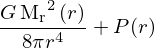

In [108]:
f = P + G * M_r**2 / (8 * pi * r**4)
f

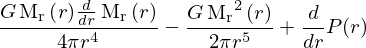

In [109]:
f.diff(r)

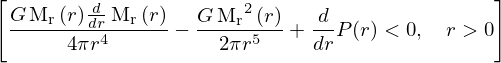

In [113]:
[f.diff(r) < 0, r > 0]

# Średnia temperatura

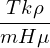

In [121]:
mH = sympy.Symbol('mH', positive=True)
P = k * rho * T / (mu * mH)
P

Te osoby które chcą i potrafią by zrobiły taką symulację Monte Carlo powstawania miliona gwiazd o podanej na początku funkcji masy. Wylosować milion gwiazd, ile ponad 8 mas, ile ponad 20 mas, średnia masa.

Pozostałe osoby liczy dla rozkładu $\rho = \rho_c (1 - r/R)$ rozkład ciśnienia i energii potencjału grawitacyjnego.